In [86]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn import linear_model
%matplotlib inline


# 1) b)

(540, 2500) (540,)
6


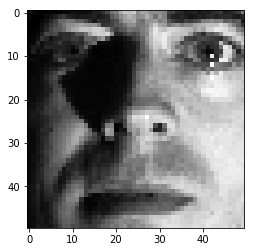

In [13]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print train_data.shape, train_labels.shape
print train_labels[280]
plt.imshow(train_data[280, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

[ 107.  113.  127. ...,   37.   38.   22.]
10
(100, 2500) (100,)


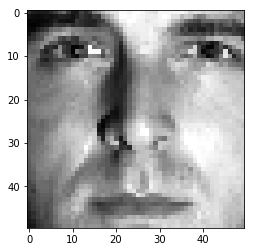

In [14]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])

test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

plt.imshow(test_data[99, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

# 1) c)

(2500,)


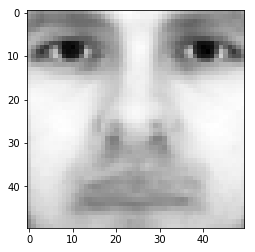

In [85]:
average_image = train_data.mean(axis=0)

plt.imshow(average_image.reshape(50,50), cmap = cm.Greys_r)
plt.show()

# 1) d)

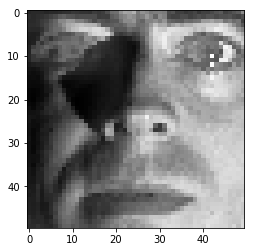

In [24]:
# when you pass a 2D numpy array and a 1D numpy array to the numpy subtract method
# you subtract the 1D array from each of the rows in the 2D array.
# This subtraction means index 0 is subtracted from index 0, and index 1 from index etc. etc.
subtracted_training_data = np.subtract(train_data, average_image)

plt.imshow(subtracted_training_data[280, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

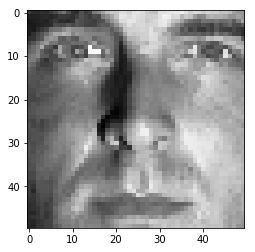

In [25]:
subtracted_test_data = np.subtract(test_data, average_image)

plt.imshow(subtracted_test_data[99, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## 1) e)

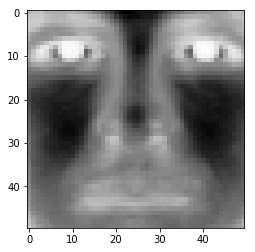

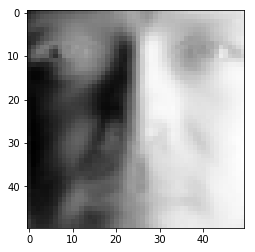

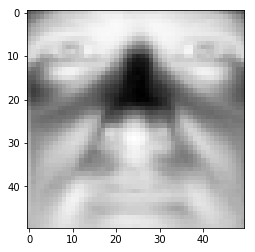

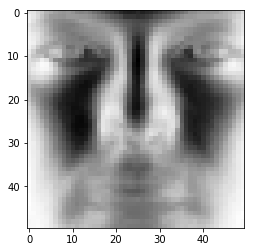

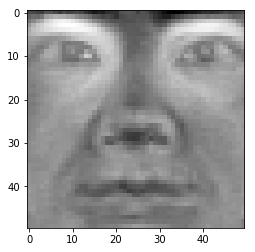

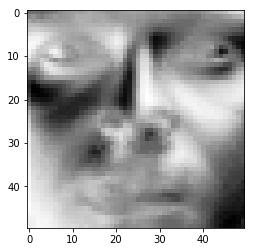

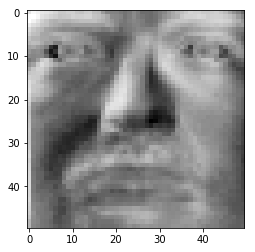

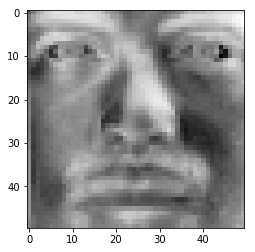

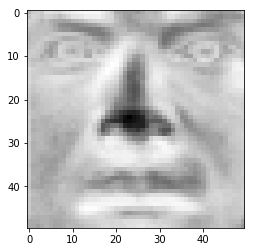

In [54]:
U, s, V_trans = np.linalg.svd(train_data, full_matrices=False) 

diag_matrix = np.diag(s)
# the full_matrices parameter specifies the shape of the returned values.  Acc to numpy:
#full_matrices : bool, optional
#If True (default), u and v have the shapes (M, M) and (N, N), respectively. 
#Otherwise, the shapes are (M, K) and (K, N), respectively, where K = min(M, N).

#this just confirms that our svd factorized correctly, because when we multiply them again, 
#(first converting the singular array into the singular diagonal matrix) we get our training data back. 
are_equal =  np.allclose(train_data, np.dot(U, np.dot(diag_matrix, V_trans))) 

for num in range(9):
    plt.imshow(V_trans[num, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

## 1) f)

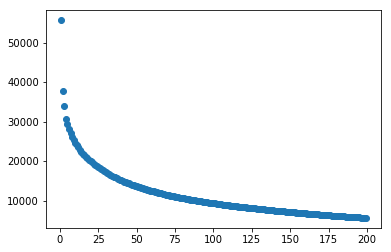

In [88]:


xs = []
ys = []

def calculate_approx_error(r):
    first_r_columns_in_U = U[:,: r]
    first_r_elements_in_diag = diag_matrix[: r,: r]
    first_r_rows_in_V_trans = V_trans[: r,:]

    approximate_r_matrix = np.dot(first_r_columns_in_U, np.dot(first_r_elements_in_diag, first_r_rows_in_V_trans))

    diff = np.subtract(train_data, approximate_r_matrix)
    
    return np.linalg.norm(diff, 'fro')

for r in range(1, 200):
    xs.append(r)
    r_rank_approx_error = calculate_approx_error(r)    
    ys.append(r_rank_approx_error)

plt.scatter(xs, ys)
plt.show()


## 1) g)

In [94]:
def generate_r_dimensional_feature_vector(image_set, r):
    first_r_rows_in_V_trans = V_trans[: r,:]
    z = np.transpose(first_r_rows_in_V_trans)
    return np.dot(image_set, z)






## 1) h)

In [100]:
def log_reg_classification_accuracy(r):  
    F_training = generate_r_dimensional_feature_vector(train_data, r)
    F_test = generate_r_dimensional_feature_vector(test_data, r)

    log_reg = sklearn.linear_model.LogisticRegression(multi_class='ovr')
    return log_reg.fit(F_training, train_labels).score(F_test,test_labels)

score_at_10 = log_reg_classification_accuracy(10)
score_at_100 = log_reg_classification_accuracy(100)
print score_at_10
print score_at_100

0.83
0.92


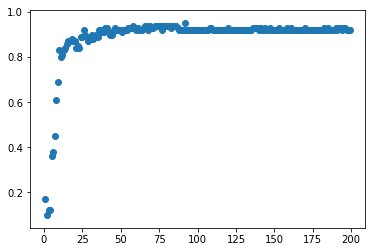

In [96]:
xs = []
accuracies = []

for r in range(1, 200):
    xs.append(r)
    accuracies.append(log_reg_classification_accuracy(r))

plt.scatter(xs, accuracies)
plt.show()
    
    

In [98]:
# just a test to see the score when you fit using the whole training data
# and compute score using the whole test data
log_reg = sklearn.linear_model.LogisticRegression(multi_class='ovr')
log_reg.fit(train_data, train_labels).score(test_data,test_labels)

0.94999999999999996